In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/mnt/Linux/Learning/Python/Datasets/titanic-training-data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
def imp_columns(df):
    return (df
            .loc[:, ['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]
            .dropna()
    )

df2 = imp_columns(df)
df2.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [7]:
df2.shape

(714, 6)

In [20]:
from sklearn.ensemble import RandomForestClassifier

X = df2.drop(columns=['Survived'])
y = df2['Survived']

# Handle missing values temporarily for this analysis
X = X.fillna(X.median())

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

  Feature  Importance
1     Age    0.400042
4    Fare    0.390792
0  Pclass    0.096372
2   SibSp    0.059424
3   Parch    0.053370


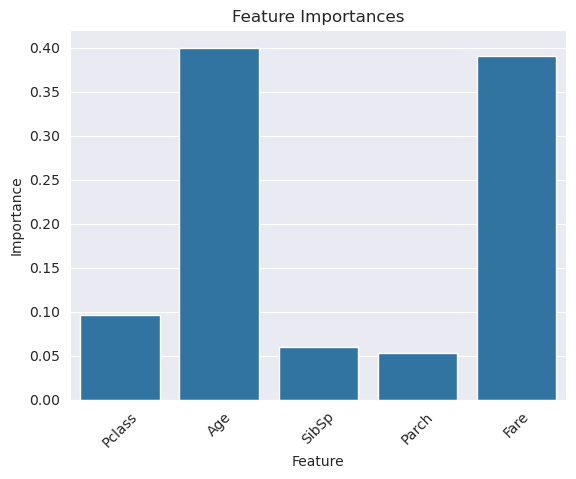

In [19]:
sns.barplot(x='Feature', y='Importance', data=feature_importance_df)
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

In [24]:
def attributes(df):
    for col in df.columns:
        print(f"{col}: {df[col].unique()}")

attributes(df2)

Survived: [0 1]
Pclass: [3 1 2]
Age: [22.   38.   26.   35.   54.    2.   27.   14.    4.   58.   20.   39.
 55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]
SibSp: [1 0 3 4 2 5]
Parch: [0 1 2 5 3 4 6]
Fare: [  7.25    71.2833   7.925   53.1      8.05    51.8625  21.075   11.1333
  30.0708  16.7     26.55    31.275    7.8542  16.      29.125   18.
  26.      13.       8.0292  35.5     31.3875 263.      27.7208  10.5
  82.1708  52.      11.2417   9.475   21.      41.5792   7.8792  17.8
  39.6875   7.8     76.7292  61.9792   7.2292  27.75    46.9     80.
  83.475   27.9      8.1583   8.6625

In [36]:
from sklearn.preprocessing import StandardScaler

from sklearn import set_config
set_config(transform_output='pandas')

scaler = StandardScaler()
X = scaler.fit_transform(df2)
X

,Survived,Pclass,Age,SibSp,Parch,Fare
0,-0.82702,0.911232,-0.530377,0.524570,-0.505895,-0.518978
1,1.20916,-1.476364,0.571831,0.524570,-0.505895,0.691897
2,1.20916,0.911232,-0.254825,-0.551703,-0.505895,-0.506214
3,1.20916,-1.476364,0.365167,0.524570,-0.505895,0.348049
4,-0.82702,0.911232,0.365167,-0.551703,-0.505895,-0.503850
...,...,...,...,...,...,...
885,-0.82702,0.911232,0.640719,-0.551703,5.357890,-0.105320
886,-0.82702,-0.282566,-0.185937,-0.551703,-0.505895,-0.410245
887,1.20916,-1.476364,-0.737041,-0.551703,-0.505895,-0.088774
889,1.20916,-1.476364,-0.254825,-0.551703,-0.505895,-0.088774


In [38]:
X.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02
mean,1.243947e-17,-5.473368e-17,2.338621e-16,-4.975789e-18,-7.214895e-17,-5.970947e-17
std,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00
min,-8.270201e-01,-1.476364e+00,-2.016979e+00,-5.517031e-01,-5.058951e-01,-6.560759e-01
25%,-8.270201e-01,-1.476364e+00,-6.595416e-01,-5.517031e-01,-5.058951e-01,-5.038498e-01
50%,-8.270201e-01,-2.825656e-01,-1.170488e-01,-5.517031e-01,-5.058951e-01,-3.583992e-01
75%,1.209160e+00,9.112324e-01,5.718310e-01,5.245701e-01,6.668618e-01,-2.495211e-02
max,1.209160e+00,9.112324e-01,3.465126e+00,4.829663e+00,6.530646e+00,9.032109e+00


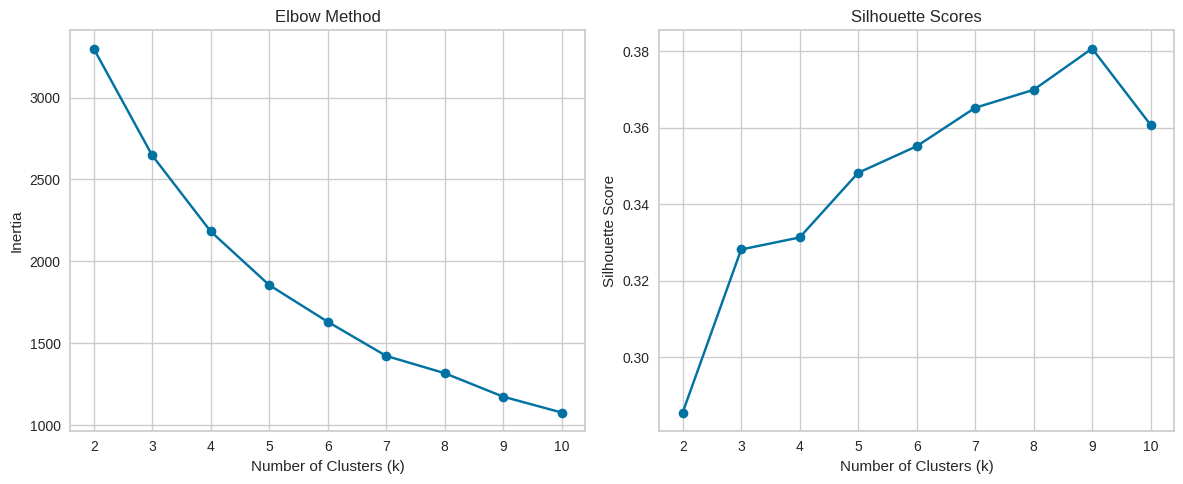

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []  # To store the sum of squared distances (inertia) for different k values
silhouette_scores = []  # To store silhouette scores for different k values

k_range = range(2, 11)  # Test k from 2 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()